### 목표: 숫자 0~9 qnsfb
- 데이터 셋: sklearn 내장 데이터 사용 => load_digits
- 데이터구성: 이미지 데이터 + 클래스(라벨/타겟/정답) ==> 지도 학습
- 학습방법: 지도학습 중 분류
    * Logistic regression, KNN, Decision Tree, RandomForest, SVC
    * 분류모델 중 하나 사용
- 구현과정
    * 데이터 준비 + 기본적인 분석
    * 데이터 전처리 => 결측치, 중복, 이상치, 스케일링
    * 학습 준비
        - 데이터 + 타겟분리
        - 학습용 + 테스트용 + 검증용 데이터 준비
    * 학습
        - 학습모델 객체 생성
        - 학습 진행
    * 평가
        - 예측 => 평가
        - 과대적합 또는 과소적합 => 데이터 교차검증

In [101]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
digitBunch = load_digits()
digitBunch.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [32]:
data = digitBunch['data']
target = digitBunch['target']


In [33]:
type(data), data.shape, type(target), target.shape
#1개의 데이터 8x8 pixel의 형태를 지님
print(data[0])
len(data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


64

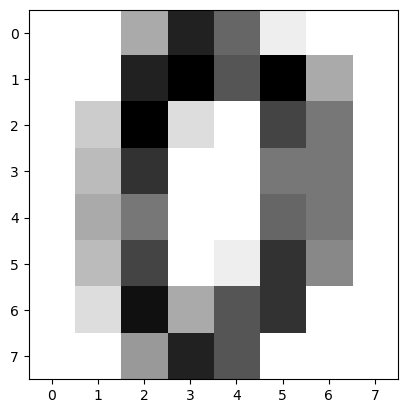

In [34]:
img_data = data[0].reshape(-1,8)
plt.imshow(img_data, cmap ='gray_r')

In [41]:
#이미지는 - 값이 존재 X이므로 0~1로 스케일링, 이미지는 255로 나누거나 MinMax scaling 사용
scaled_data = data/255
scaled_data
mms = MinMaxScaler()
MMS_data = mms.fit_transform(data)
MMS_data

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

#### [3] 학습준비

In [57]:
#학습용 / 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, random_state= 12, test_size=0.2)


#### [4] 학습

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
pred= knn.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print(f'accuracy_score: {accuracy}')

accuracy_score: 0.975


#### 예측

In [96]:
new_data = data[-1].reshape(-1,1)
new_data
mms = MinMaxScaler()
new_data = mms.fit_transform(new_data)
new_data = new_data.reshape(1,-1)

In [97]:
knn.predict(new_data)


array([8])

In [98]:
new_data

array([[0.    , 0.    , 0.625 , 0.875 , 0.5   , 0.0625, 0.    , 0.    ,
        0.    , 0.125 , 1.    , 0.875 , 0.375 , 0.0625, 0.    , 0.    ,
        0.    , 0.    , 0.9375, 0.9375, 0.5   , 0.9375, 0.    , 0.    ,
        0.    , 0.    , 0.3125, 1.    , 1.    , 0.625 , 0.    , 0.    ,
        0.    , 0.    , 0.75  , 0.9375, 0.9375, 0.75  , 0.    , 0.    ,
        0.    , 0.25  , 1.    , 0.375 , 0.25  , 1.    , 0.375 , 0.    ,
        0.    , 0.5   , 1.    , 0.625 , 0.5   , 1.    , 0.5   , 0.    ,
        0.    , 0.0625, 0.5   , 0.75  , 0.875 , 0.75  , 0.0625, 0.    ]])

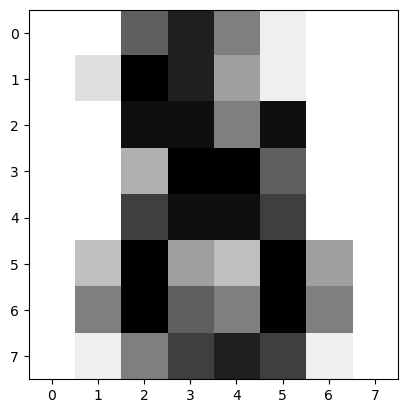

In [99]:
plt.imshow(new_data.reshape(-1,8),cmap='gray_r')

#### [4] 학습2 SVC


In [104]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [106]:
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print(f'accuracy_score: {accuracy}')

accuracy_score: 0.9916666666666667


In [110]:
from sklearn.utils import *
from sklearn.metrics import *
def allest(data, label,x_test, y_test ,choose_type):
    rets = all_estimators(type_filter= choose_type)#분류 혹은 회귀

    result=[]
    for name, estimator_ in rets:
        try:
            model=estimator_()
            model.fit(data, label)
            sc=model.score(data, label)
            model 
            result.append((name, round(sc, 2)))
        except Exception:
            pass

    return result
print(allest(X_train,y_train,'classifier'))

TypeError: allest() missing 2 required positional arguments: 'y_test' and 'choose_type'

In [109]:
result

NameError: name 'result' is not defined

In [ ]:
(sorted(result, key=lambda x : x[1], reverse=True))